In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Phân tích và xử lý dữ liệu thiếu trong Dataset Admission

sns.set()  # thiết lập style mặc định (seaborn-darkgrid)

# Đọc dữ liệu
df = pd.read_csv('Admission_Predict.csv')

# Hiển thị thông tin cơ bản của dataset
print("Thông tin cơ bản về dataset:")
df.info()


Thông tin cơ bản về dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [69]:
# Bước 2: Thống kê mô tả (trung bình, min, max, độ lệch chuẩn)
## 2. Thống kê mô tả cơ bản
df_stats = df.rename(columns=lambda x: x.strip())
df_stats = df.drop('Serial No.', axis=1)

# Thống kê mô tả tổng quan
print("Thống kê mô tả tổng quan:")
print(df_stats.describe())


Thống kê mô tả tổng quan:
        GRE Score  TOEFL Score  University Rating         SOP         LOR  \
count  400.000000   400.000000         400.000000  400.000000  400.000000   
mean   316.807500   107.410000           3.087500    3.400000    3.452500   
std     11.473646     6.069514           1.143728    1.006869    0.898478   
min    290.000000    92.000000           1.000000    1.000000    1.000000   
25%    308.000000   103.000000           2.000000    2.500000    3.000000   
50%    317.000000   107.000000           3.000000    3.500000    3.500000   
75%    325.000000   112.000000           4.000000    4.000000    4.000000   
max    340.000000   120.000000           5.000000    5.000000    5.000000   

             CGPA    Research  Chance of Admit  
count  400.000000  400.000000       400.000000  
mean     8.598925    0.547500         0.724350  
std      0.596317    0.498362         0.142609  
min      6.800000    0.000000         0.340000  
25%      8.170000    0.000000      

In [45]:
# Thêm thống kê về độ lệch (skewness) và độ nhọn (kurtosis)
print("\nĐộ lệch (skewness) của các biến:")
print(df_stats.skew())


Độ lệch (skewness) của các biến:
GRE Score           -0.062893
TOEFL Score          0.057216
University Rating    0.171260
SOP                 -0.275761
LOR                 -0.106991
CGPA                -0.065991
Research            -0.191582
Chance of Admit     -0.353448
dtype: float64


In [46]:
print("\nĐộ nhọn (kurtosis) của các biến:")
print(df_stats.kurtosis())


Độ nhọn (kurtosis) của các biến:
GRE Score           -0.700489
TOEFL Score         -0.578778
University Rating   -0.796287
SOP                 -0.675610
LOR                 -0.662484
CGPA                -0.458476
Research            -1.973187
Chance of Admit     -0.389126
dtype: float64


In [47]:
## Phân tích chi tiết từng nhóm biến

# Phân tích điểm số (GRE, TOEFL, CGPA)
scores = ['GRE Score', 'TOEFL Score', 'CGPA']
print("\nThống kê về điểm số:")
print(df_stats[scores].describe())

# Phân tích đánh giá (University Rating, SOP, LOR)
ratings = ['University Rating', 'SOP', 'LOR '] 
print("\nThống kê về các đánh giá:")
print(df_stats[ratings].describe())

# Phân tích Research và Chance of Admit
print("\nThống kê về Research và Chance of Admit:")
print(df_stats[['Research', 'Chance of Admit ']].describe())


Thống kê về điểm số:
        GRE Score  TOEFL Score        CGPA
count  400.000000   400.000000  400.000000
mean   316.807500   107.410000    8.598925
std     11.473646     6.069514    0.596317
min    290.000000    92.000000    6.800000
25%    308.000000   103.000000    8.170000
50%    317.000000   107.000000    8.610000
75%    325.000000   112.000000    9.062500
max    340.000000   120.000000    9.920000

Thống kê về các đánh giá:
       University Rating         SOP        LOR 
count         400.000000  400.000000  400.000000
mean            3.087500    3.400000    3.452500
std             1.143728    1.006869    0.898478
min             1.000000    1.000000    1.000000
25%             2.000000    2.500000    3.000000
50%             3.000000    3.500000    3.500000
75%             4.000000    4.000000    4.000000
max             5.000000    5.000000    5.000000

Thống kê về Research và Chance of Admit:
         Research  Chance of Admit 
count  400.000000        400.000000
mean     

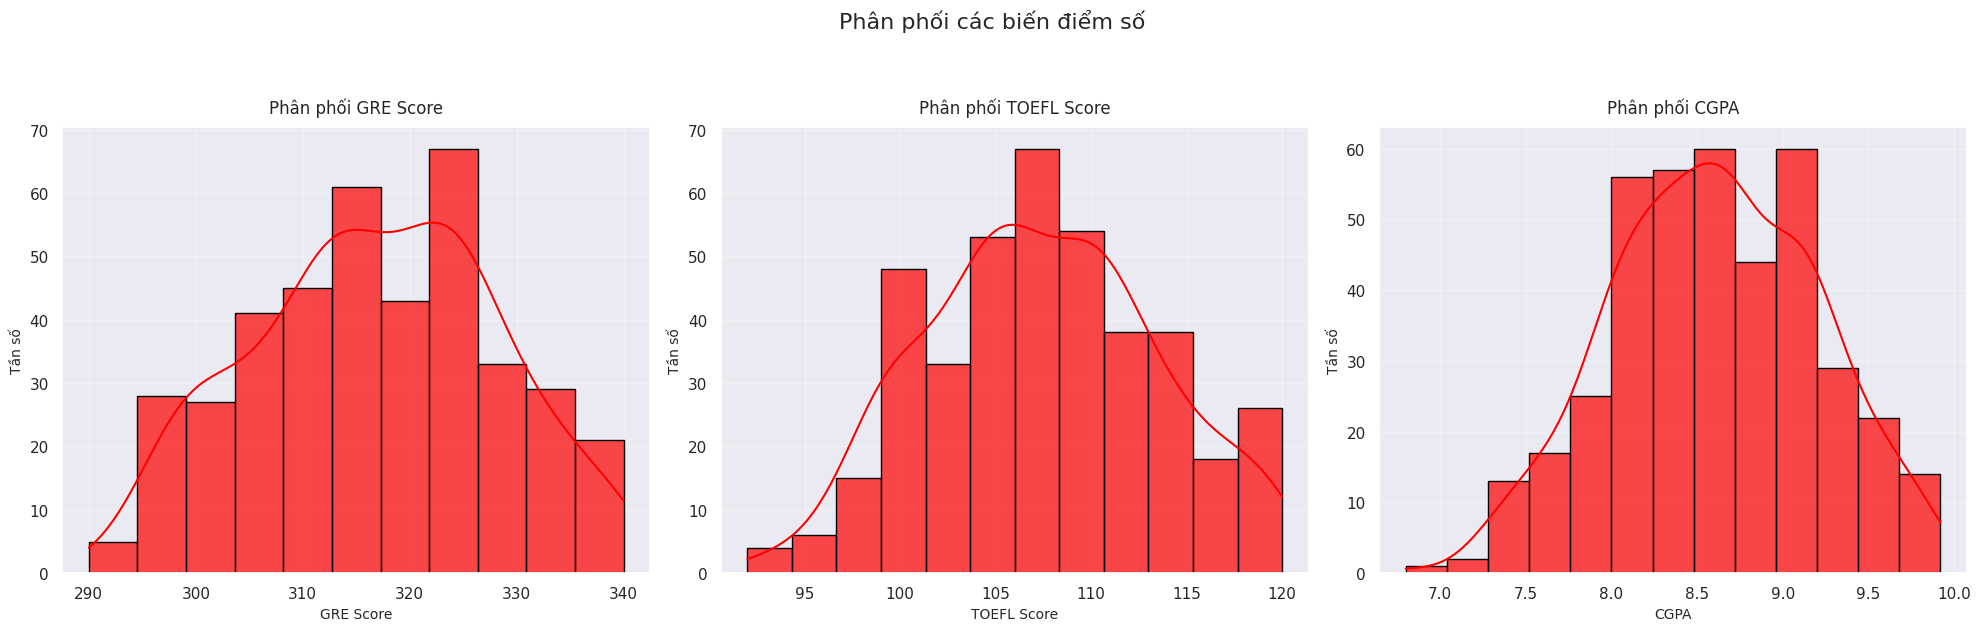

In [48]:
## Bước 3: Trực quan hóa phân phối các biến đầu vào (histogram, KDE plot)
# Trực quan hóa phân phối các biến điểm số

# Tạo subplot cho các biến điểm số
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Phân phối các biến điểm số', fontsize=16, y=1.05)


for i, var in enumerate(scores):
    # Vẽ histogram và KDE plot với màu sắc và style đẹp hơn
    sns.histplot(data=df, x=var, kde=True, ax=axes[i], 
                color='red', edgecolor='black', alpha=0.7)
    
    # Thêm tiêu đề và nhãn với font size phù hợp
    axes[i].set_title(f'Phân phối {var}', fontsize=12, pad=10)
    axes[i].set_xlabel(var, fontsize=10)
    axes[i].set_ylabel('Tần số', fontsize=10)
    
    # Thêm lưới để dễ đọc
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

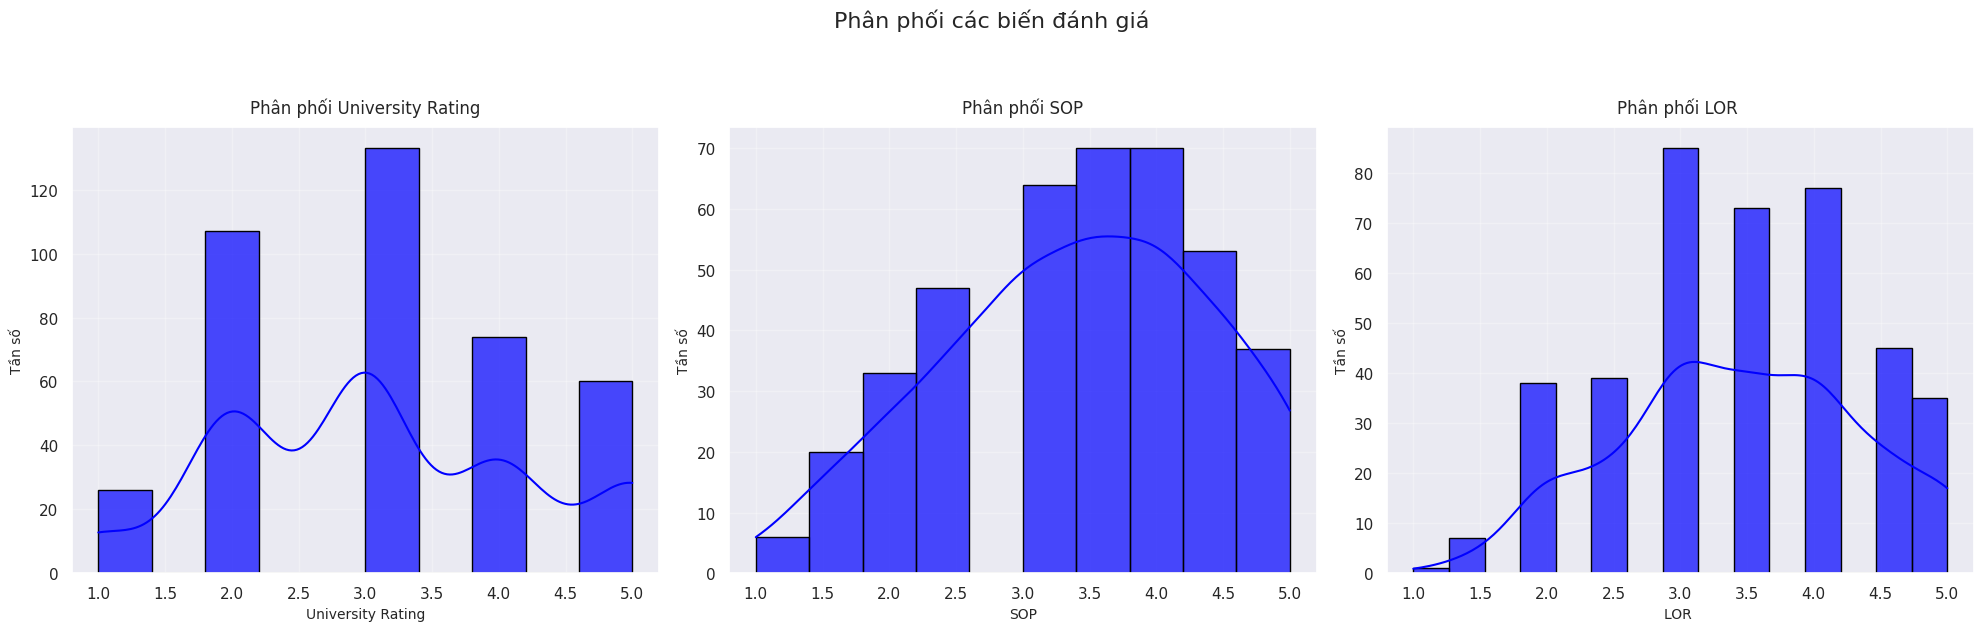

In [49]:
# Trực quan hóa phân phối các biến đánh giá
# Tạo subplot cho các biến đánh giá
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Phân phối các biến đánh giá', fontsize=16, y=1.05)


for i, var in enumerate(ratings):
    # Vẽ histogram và KDE plot với màu sắc và style đẹp hơn
    sns.histplot(data=df, x=var, kde=True, ax=axes[i],
                color='blue', edgecolor='black', alpha=0.7)
    
    # Thêm tiêu đề và nhãn với font size phù hợp
    axes[i].set_title(f'Phân phối {var}', fontsize=12, pad=10)
    axes[i].set_xlabel(var, fontsize=10)
    axes[i].set_ylabel('Tần số', fontsize=10)
    
    # Thêm lưới để dễ đọc
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

/tmp/ipykernel_15104/70225724.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Research', ax=axes[0],


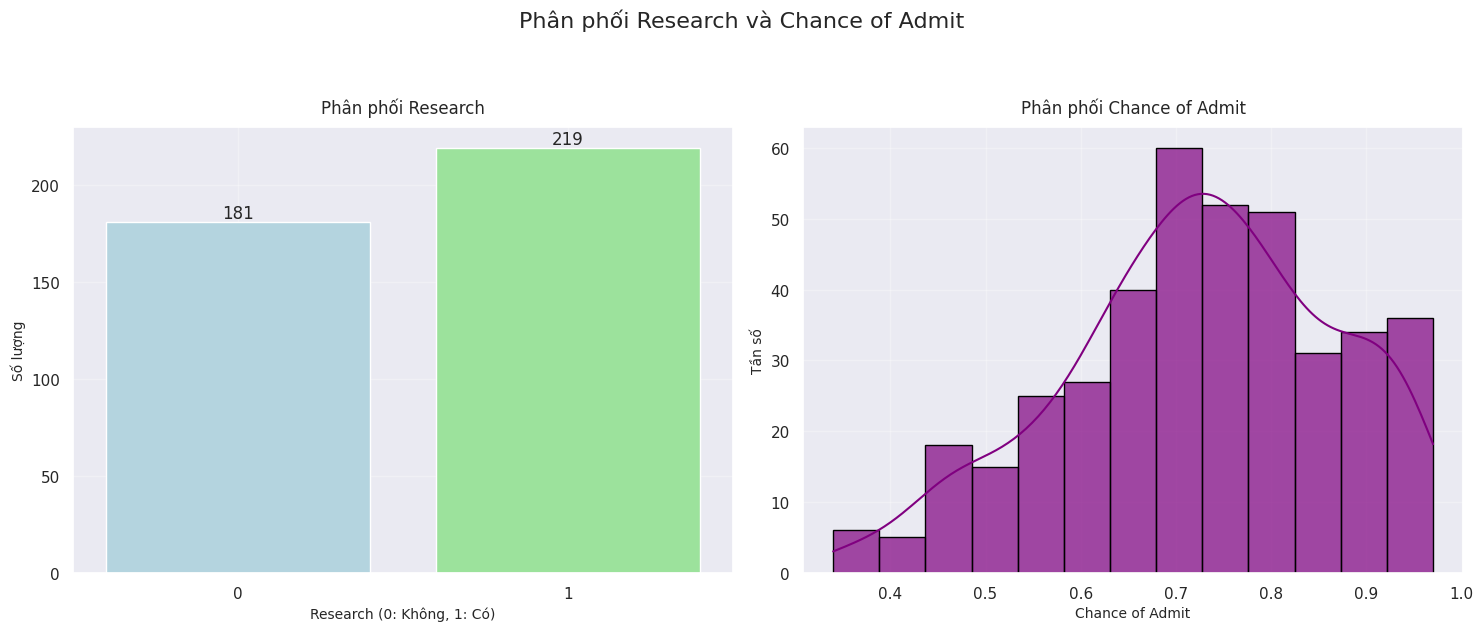

In [50]:
# Trực quan hóa Research và Chance of Admit
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Phân phối Research và Chance of Admit', fontsize=16, y=1.05)

# Vẽ countplot cho Research
sns.countplot(data=df, x='Research', ax=axes[0], 
             palette=['lightblue', 'lightgreen'])
axes[0].set_title('Phân phối Research', fontsize=12, pad=10)
axes[0].set_xlabel('Research (0: Không, 1: Có)', fontsize=10)
axes[0].set_ylabel('Số lượng', fontsize=10)
axes[0].grid(True, alpha=0.3)

# Thêm số lượng cụ thể trên mỗi cột
for i in axes[0].containers:
    axes[0].bar_label(i)

# Vẽ histogram và KDE plot cho Chance of Admit
sns.histplot(data=df, x='Chance of Admit ', kde=True, ax=axes[1],
            color='purple', edgecolor='black', alpha=0.7)
axes[1].set_title('Phân phối Chance of Admit', fontsize=12, pad=10)
axes[1].set_xlabel('Chance of Admit', fontsize=10)
axes[1].set_ylabel('Tần số', fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

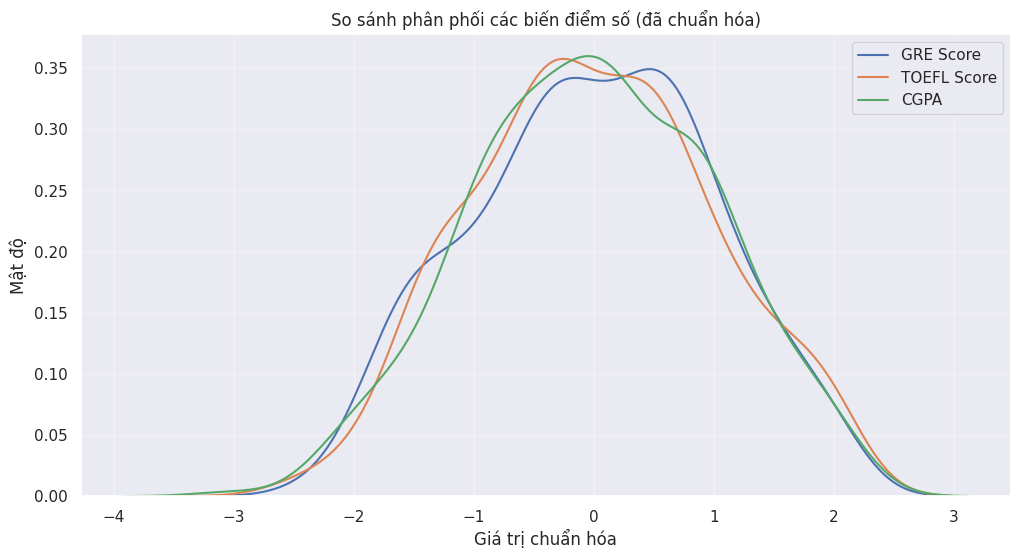

In [51]:
# So sánh phân phối bằng KDE plot
# Chuẩn hóa các biến số để có thể so sánh trên cùng một đồ thị
df_normalized = df.copy()
for column in scores:
    df_normalized[column] = (df[column] - df[column].mean()) / df[column].std()

# Vẽ KDE plot cho các biến đã chuẩn hóa
plt.figure(figsize=(12, 6))
for var in scores:
    sns.kdeplot(data=df_normalized[var], label=var)

plt.title('So sánh phân phối các biến điểm số (đã chuẩn hóa)')
plt.xlabel('Giá trị chuẩn hóa')
plt.ylabel('Mật độ')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

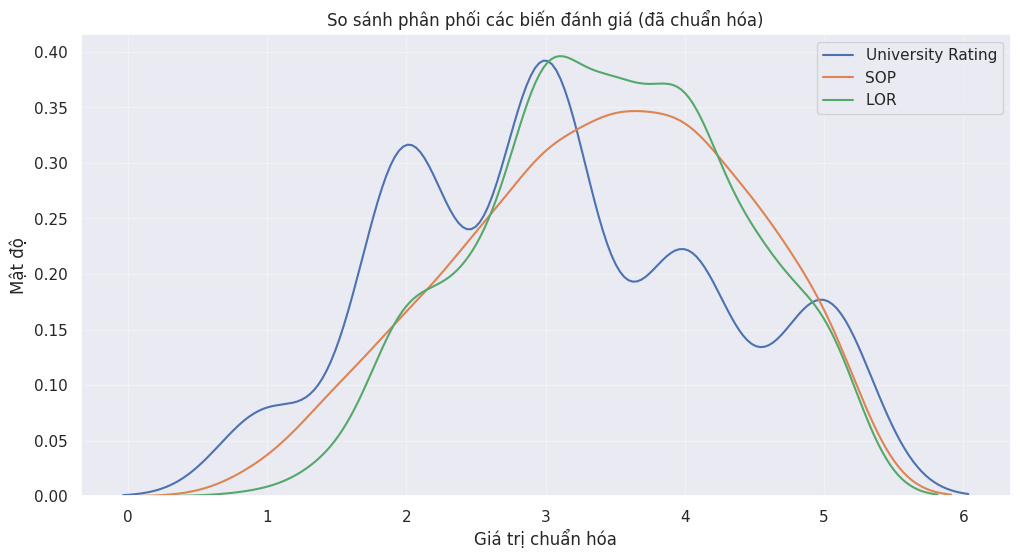

In [52]:
plt.figure(figsize=(12, 6))
for var in ratings:
    sns.kdeplot(data=df_normalized[var], label=var)

plt.title('So sánh phân phối các biến đánh giá (đã chuẩn hóa)')
plt.xlabel('Giá trị chuẩn hóa')
plt.ylabel('Mật độ')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



/tmp/ipykernel_15104/2626680869.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_melt, x='variable', y='value',


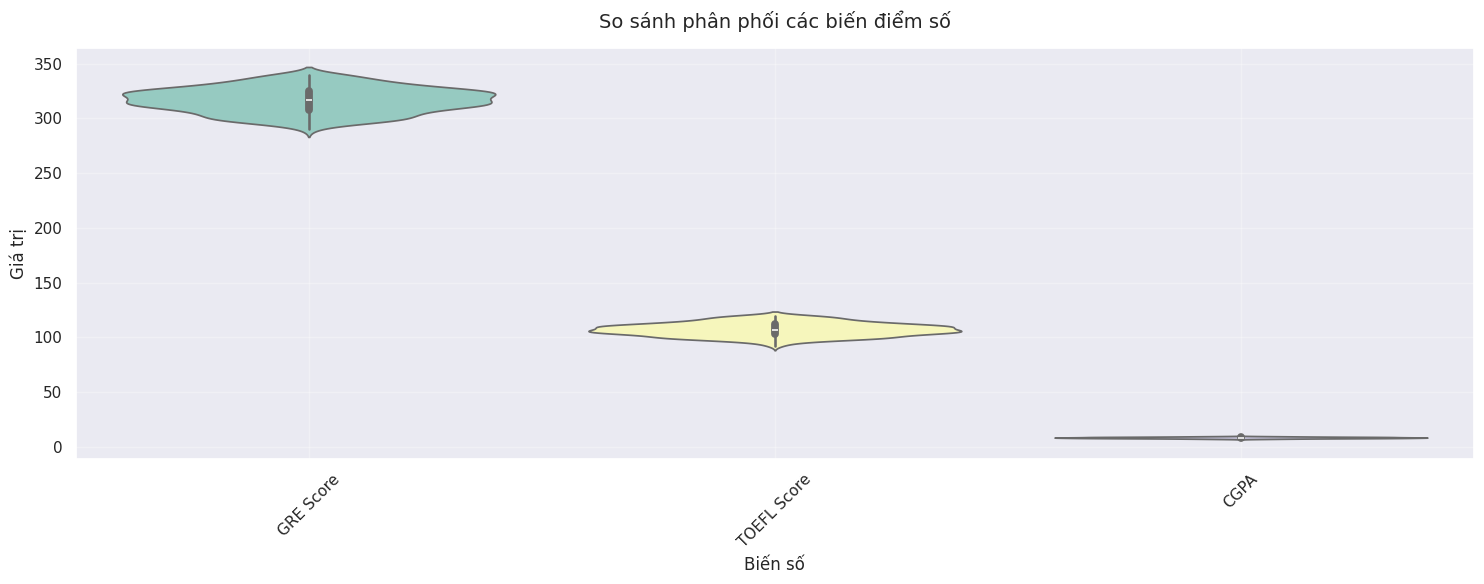

In [53]:
# Tạo violin plot để so sánh phân phối các biến điểm số
plt.figure(figsize=(15, 6))

# Chuyển dữ liệu sang dạng long format để vẽ violin plot
df_melt = pd.melt(df[scores])

# Vẽ violin plot với các tùy chỉnh về style
sns.violinplot(data=df_melt, x='variable', y='value', 
               palette='Set3', inner='box')

# Tùy chỉnh đồ thị
plt.title('So sánh phân phối các biến điểm số', fontsize=14, pad=15)
plt.xlabel('Biến số', fontsize=12)
plt.ylabel('Giá trị', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Hiển thị đồ thị
plt.tight_layout()
plt.show()

/tmp/ipykernel_15104/3581127477.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_rating_melt, x='variable', y='value',


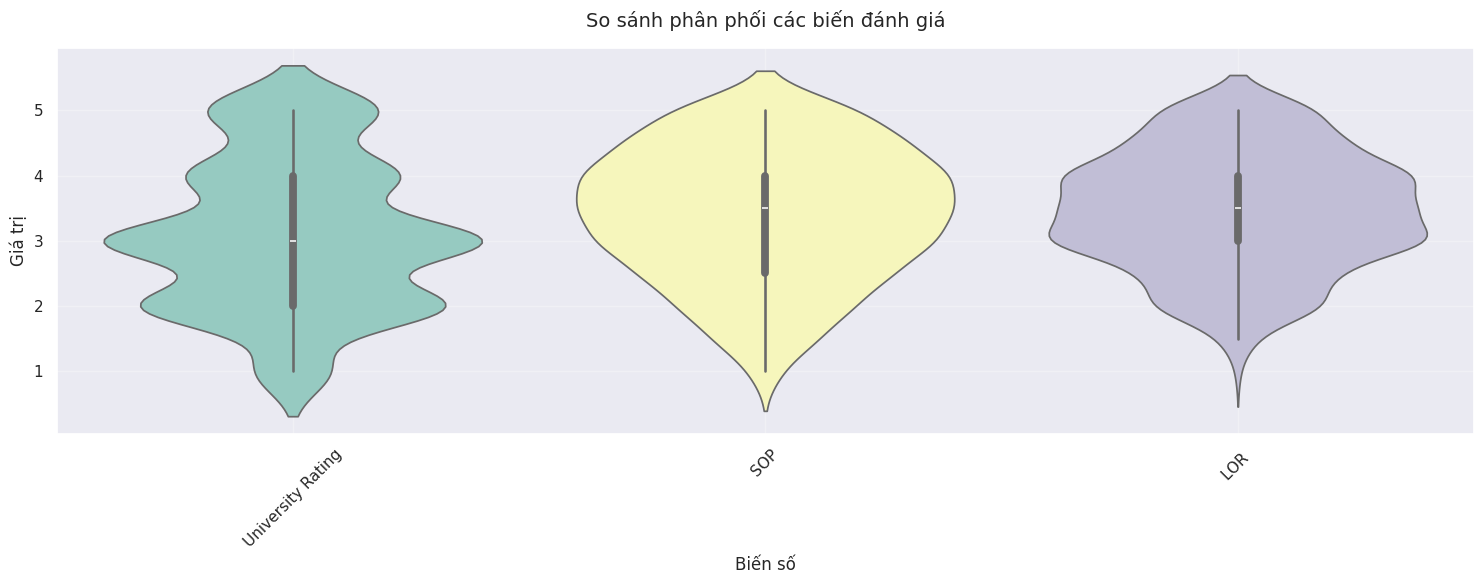

In [54]:
plt.figure(figsize=(15, 6))

# Chuyển dữ liệu sang dạng long format để vẽ violin plot
df_rating_melt = pd.melt(df[ratings])

# Vẽ violin plot với các tùy chỉnh về style
sns.violinplot(data=df_rating_melt, x='variable', y='value',
               palette='Set3', inner='box')

# Tùy chỉnh đồ thị
plt.title('So sánh phân phối các biến đánh giá', fontsize=14, pad=15)
plt.xlabel('Biến số', fontsize=12)
plt.ylabel('Giá trị', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Hiển thị đồ thị
plt.tight_layout()
plt.show()

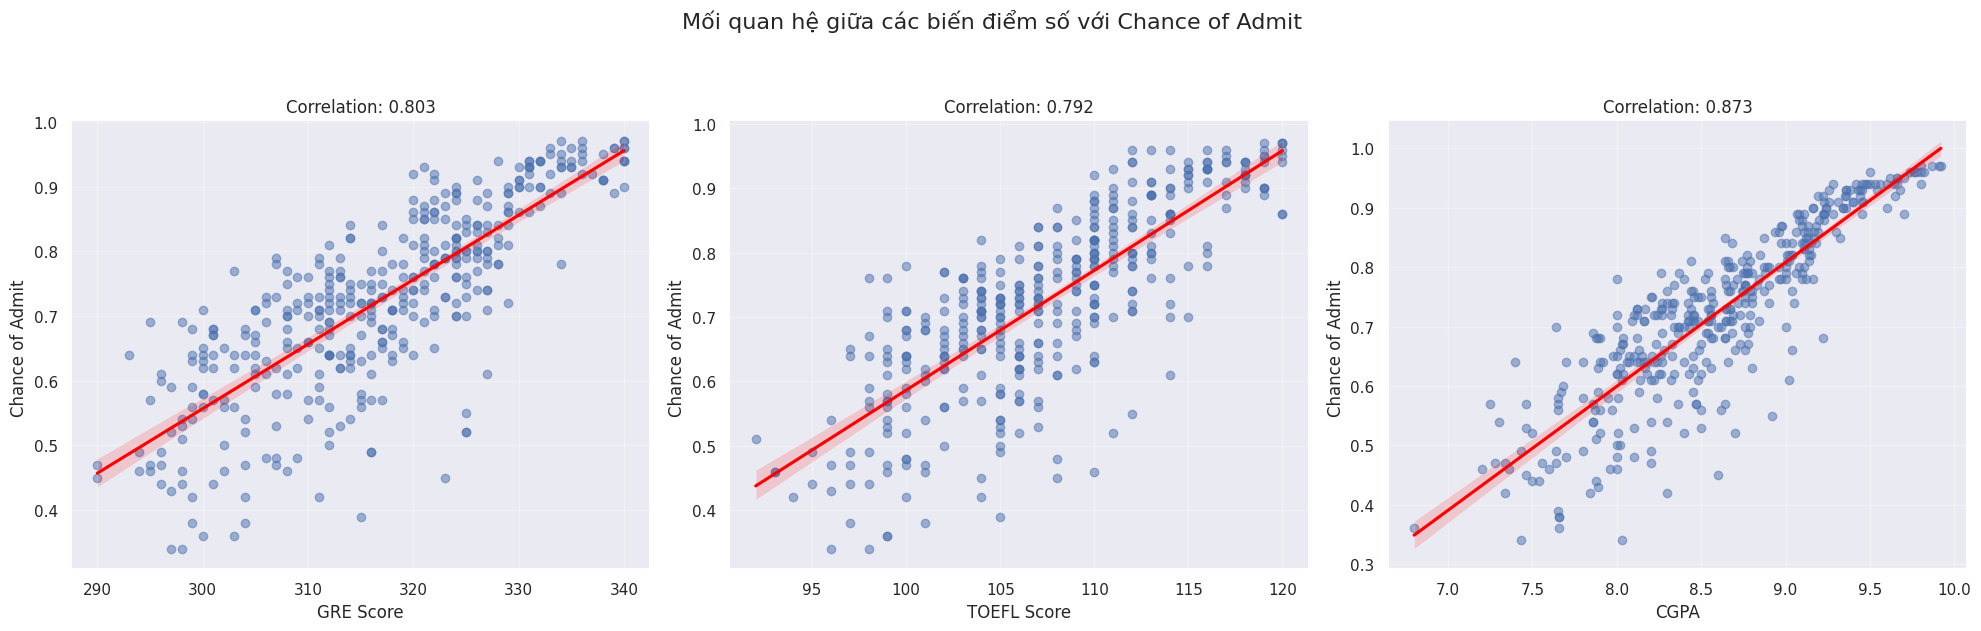

In [55]:
# Bước 4: Phân tích mối quan hệ giữa các biến điểm số với Chance of Admit
# Vẽ Scatter plot với Regression line

# Tạo subplot cho 3 biến điểm số
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Mối quan hệ giữa các biến điểm số với Chance of Admit', fontsize=16, y=1.05)


# Vẽ scatter plot cho từng biến
for i, var in enumerate(scores):
    # Vẽ scatter plot
    sns.regplot(data=df, x=var, y='Chance of Admit ', ax=axes[i],
                scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
    
    # Tính hệ số tương quan
    corr = df[var].corr(df['Chance of Admit ']).round(3)
    
    # Thêm tiêu đề và nhãn
    axes[i].set_title(f'Correlation: {corr}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Chance of Admit ')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

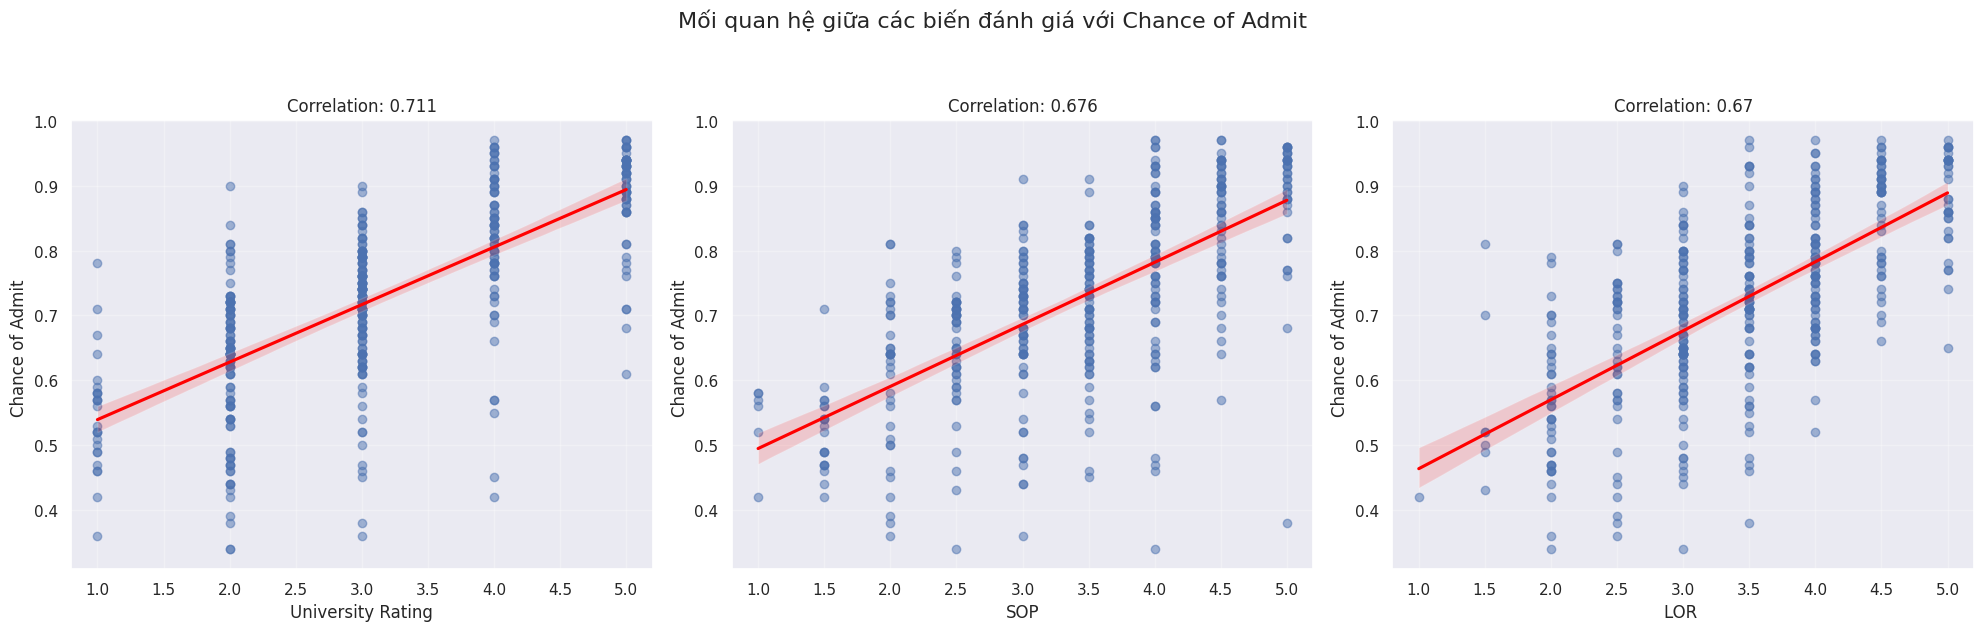

In [56]:
# Tạo subplot cho 3 biến đánh giá    
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Mối quan hệ giữa các biến đánh giá với Chance of Admit', fontsize=16, y=1.05)


# Vẽ scatter plot cho từng biến
for i, var in enumerate(ratings):
    # Vẽ scatter plot
    sns.regplot(data=df, x=var, y='Chance of Admit ', ax=axes[i],
                scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
    
    # Tính hệ số tương quan
    corr = df[var].corr(df['Chance of Admit ']).round(3)
    
    # Thêm tiêu đề và nhãn
    axes[i].set_title(f'Correlation: {corr}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Chance of Admit ')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

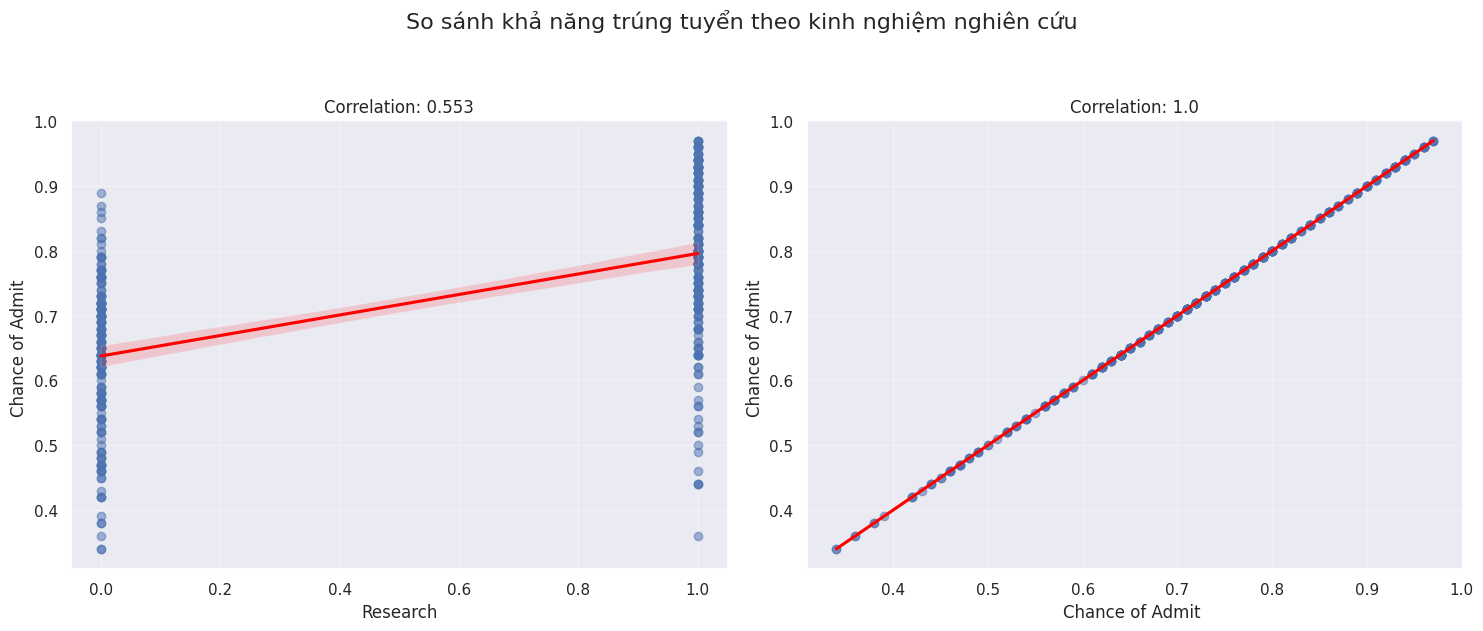

In [57]:
#tạo subplot cho 2 biến nghiên cứu và Chance of Admit
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('So sánh khả năng trúng tuyển theo kinh nghiệm nghiên cứu', fontsize=16, y=1.05)

#vẽ scatter plot cho từng biến
for i, var in enumerate(['Research', 'Chance of Admit ']):
    sns.regplot(data=df, x=var, y='Chance of Admit ', ax=axes[i],
                scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
    
    #tính hệ số tương quan
    corr = df[var].corr(df['Chance of Admit ']).round(3)
    
    #thêm tiêu đề và nhãn
    axes[i].set_title(f'Correlation: {corr}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Chance of Admit ')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


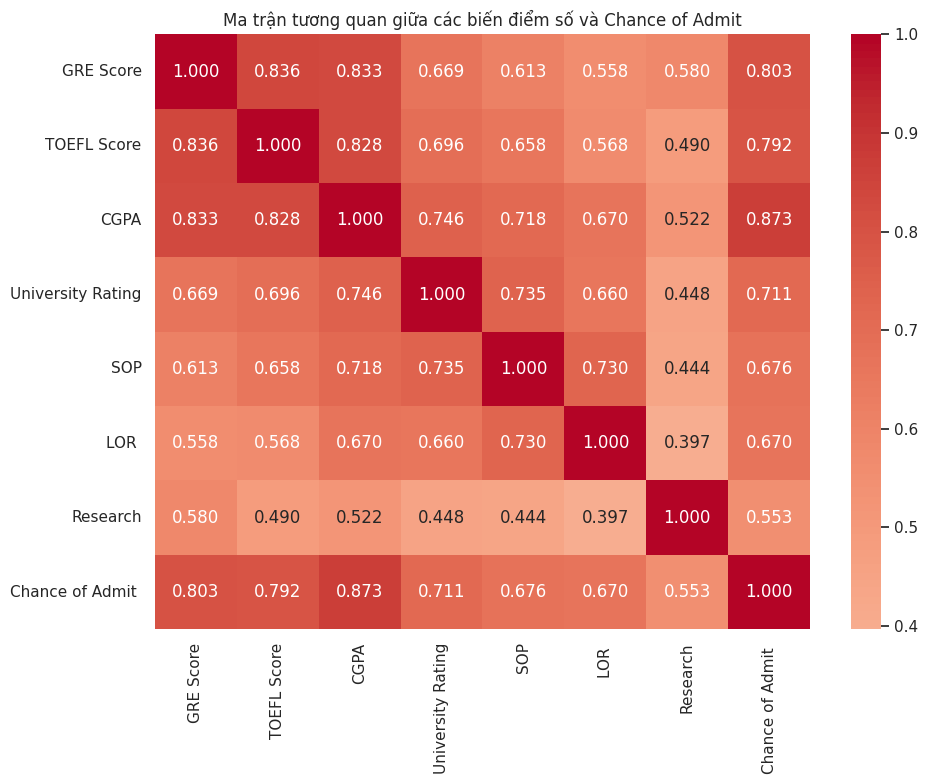

In [58]:
# Phân tích mối quan hệ giữa các biến  và Chance of Admit
# Tính ma trận tương quan cho các biến  và Chance of Admit
corr_matrix = df[scores + ratings + ['Research', 'Chance of Admit ']].corr()

# Vẽ heatmap cho ma trận tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.3f')
plt.title('Ma trận tương quan giữa các biến điểm số và Chance of Admit')
plt.tight_layout()
plt.show()

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [60]:

# Xóa khoảng trắng ở tên cột (nếu có)
df.columns = df.columns.str.strip()

# Chọn features và target
X = df.drop('Chance of Admit', axis=1)
y = df['Chance of Admit']

# Chia tập train và test (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [68]:


# Khởi tạo mô hình
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Dictionary lưu kết quả
results = {}

# Huấn luyện và đánh giá từng mô hình
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Tính toán các chỉ số đánh giá
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        "MAE": mae,
        "MSE": mse,
        "R2 Score": r2
    }

print("📊 Kết quả đánh giá mô hình:\n")
for name, metrics in results.items():
    print(f"🔹 {name}")
    for metric, value in metrics.items():
        print(f"   {metric}: {value:.4f}")
    print("-" * 30)

# Hồ sơ giả lập: GRE, TOEFL, Rating, SOP, LOR, CGPA, Research
sample_applicant = np.array([[337,118,4,4.5,4.5,9.65,1]])

# Chuẩn hóa hồ sơ
sample_scaled = scaler.transform(sample_applicant)

# Dự đoán với từng mô hình
print("\n🔮 Dự đoán xác suất trúng tuyển cho hồ sơ mới:")
for name, model in models.items():
    predicted_chance = model.predict(sample_scaled)
    print(f"{name}: {predicted_chance[0]:.4f}")

📊 Kết quả đánh giá mô hình:

🔹 Linear Regression
   MAE: 0.0480
   MSE: 0.0046
   R2 Score: 0.8212
------------------------------
🔹 Random Forest
   MAE: 0.0498
   MSE: 0.0050
   R2 Score: 0.8079
------------------------------
🔹 Gradient Boosting
   MAE: 0.0501
   MSE: 0.0053
   R2 Score: 0.7958
------------------------------

🔮 Dự đoán xác suất trúng tuyển cho hồ sơ mới:
Linear Regression: 0.9468
Random Forest: 0.9441
Gradient Boosting: 0.9388


/home/nin/Documents/danglenin2202088/final_project/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
